In [1]:
import pandas as pd
data = pd.read_csv("Hamspam.csv",encoding = "ISO-8859-1")

# "ISO-8859-1"  --> This encoding is used
# text within the CSV file is encoded
# ISO-8859-1 is a specific character encoding standard
# specifying the correct encoding to handle any special characters.

In [2]:
data.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [3]:
data.isnull().sum()

,0
type,0
text,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


# Data Cleaning

In [5]:
import re #regular expression
import string

def clean_text(text):
    '''Make text 1.lowercase  , remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()                                               # 1.lower only text column
    text = re.sub('\[.*?\]', '', text)                                # " " replace with nothing
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [6]:
data['text'] = data.text.apply(clean)
data.text

,text
0,hope you are having a good week just checking in
1,kgive back my thanks
2,am also doing in cbe only but have to pay
3,complimentary star ibiza holiday or å£ cash n...
4,okmail dear dave this is your final notice to ...
...,...
5554,you are a great role model you are giving so m...
5555,awesome i remember the last time we got somebo...
5556,if you dont your prize will go to another cust...
5557,sms ac jsco energy is high but u may not know ...


In [7]:
#Word frequency
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq

,count
to,2243
i,2228
you,2118
a,1437
the,1323
u,1298
and,965
is,892
in,886
me,789


In [8]:
#removing stopwords

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
data['text']

,text
0,hope good week checking
1,kgive back thanks
2,also cbe pay
3,complimentary star ibiza holiday å£ cash needs...
4,okmail dear dave final notice collect tenerife...
...,...
5554,great role model giving much really wish day m...
5555,awesome remember last time got somebody high f...
5556,dont prize go another customer tc wwwtcbiz pol...
5557,sms ac jsco energy high u may know ur leadersh...


In [10]:
data.shape

(5559, 2)

In [11]:
# word frequency after removal of stopwords
# All the data into sinfle corpus
# value_count
freq_Sw = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq_Sw

,count
u,1298
call,577
im,462
ur,389
get,384
å£,293
dont,287
go,282
ok,278
free,275


In [12]:
# Below code
# CountVectorizer is a matrix --> each row represents a document ,each column represents a word from the vocabulary
# min_df = 1: (word more than 1) "minimum document frequency ,It means that only words that appear in at least 1 document included in the vocabulary.
# max_df = 0.9: ( Should not be more 90) words appearing in more than 90% of the documents will be excluded from the vocabulary.

In [13]:
# below
# Explain --> np.asarray(X.sum(axis=0)).ravel().tolist()
# X represents --> the output of the CountVectorizer
# X.sum(axis=0) Calculates the sum of each column, effectively counting the occurrences of each word across all documents
# np.asarray(...) converts the result into a NumPy array.
# ravel() flattens the array into a single row.
# tolist() converts the flattened array into a Python list


In [14]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data["text"])

# Use get_feature_names_out() instead of get_feature_names()
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

#print(word_freq_df.sort('occurrences',ascending = False).head())

In [15]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aa,1,0.000022
1,aah,3,0.000065
2,aaniye,1,0.000022
3,aaooooright,1,0.000022
4,aathilove,3,0.000065
5,aathiwhere,3,0.000065
6,ab,1,0.000022
7,abbey,1,0.000022
8,abdomen,1,0.000022
9,abeg,1,0.000022


In [16]:
# down code
# max_features=1000: 1000 most frequent words
# max_df=0.5:  (filtering out very common words) Words appearing in more than 50% of the documents will be excluded from the vocabulary
# smooth_idf=True: This parameter adds "1" to the document frequencies to prevent division by zero errors when calculating IDF
# Inverse Document Frequency

# dense = doc_vec.todense()
# The initial output of TfidfVectorizer is typically a sparse matrix
# This line converts the sparse matrix into a dense matrix, where all values are explicitly stored.

In [17]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [18]:
df

# data is transfered into numerical

,abiola,able,abt,accept,access,account,actually,add,address,admirer,...,youve,yr,yrs,yup,ââ,ââèïs,ââèït,ûªs,ûªt,ûï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-gram

In [19]:
#Bi-gram

def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),   #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)     # descending order
    return words_freq[:n]

In [20]:
# Above code
# get_top_n2_words (This function) find most frequent bi-grams  within a given text corpus.
# 2000--> This limits the vocabulary to the 2000 most frequent bi-grams, reducing the size of the data.
# 0 --> This sums the values in each column of the bag-of-words matrix
# vec1.vocabulary_ --> dictionary that maps each bi-gram to its corresponding column index in the bag-of-words matrix
# dictionary and creates a list of tuples. Each tuple contains a bi-gram (word) and its frequency (sum_words[0, idx]
# :n --> This line returns the top n bi-grams from the sorted list

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(data["text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,please call,53
1,call later,50
2,ill call,48
3,let know,40
4,sorry ill,39


<ipython-input-22-8ad2e7024b98>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])


[Text(0, 0, 'please call'),
 Text(1, 0, 'call later'),
 Text(2, 0, 'ill call'),
 Text(3, 0, 'let know'),
 Text(4, 0, 'sorry ill'),
 Text(5, 0, 'dont know'),
 Text(6, 0, 'good morning'),
 Text(7, 0, 'po box'),
 Text(8, 0, 'call landline'),
 Text(9, 0, 'take care'),
 Text(10, 0, 'im going'),
 Text(11, 0, 'guaranteed call'),
 Text(12, 0, 'new year'),
 Text(13, 0, 'prize guaranteed'),
 Text(14, 0, 'ok lor'),
 Text(15, 0, 'pls send'),
 Text(16, 0, 'every week'),
 Text(17, 0, 'send stop'),
 Text(18, 0, 'good night'),
 Text(19, 0, 'im gonna')]

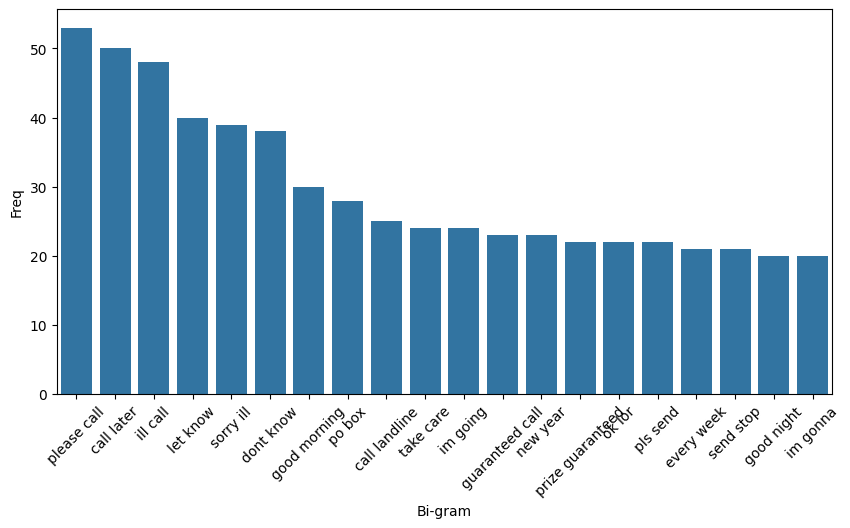

In [22]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [23]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]


In [24]:
top3_words = get_top_n3_words(data["text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [25]:
top3_df

,Tri-gram,Freq
0,ill call later,42
1,sorry ill call,38
2,prize guaranteed call,21
3,call land line,18
4,happy new year,18
...,...,...
195,said mind go,5
196,mind go bedroom,5
197,go bedroom minute,5
198,bedroom minute ok,5


<ipython-input-26-785b9243dc80>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])


[Text(0, 0, 'ill call later'),
 Text(1, 0, 'sorry ill call'),
 Text(2, 0, 'prize guaranteed call'),
 Text(3, 0, 'call land line'),
 Text(4, 0, 'happy new year'),
 Text(5, 0, 'private account statement'),
 Text(6, 0, 'guaranteed call land'),
 Text(7, 0, 'call identifier code'),
 Text(8, 0, 'land line claim'),
 Text(9, 0, 'draw shows prize'),
 Text(10, 0, 'shows prize guaranteed'),
 Text(11, 0, 'identifier code expires'),
 Text(12, 0, 'pls send message'),
 Text(13, 0, 'account statement shows'),
 Text(14, 0, 'statement shows unredeemed'),
 Text(15, 0, 'camcorder reply call'),
 Text(16, 0, 'cant pick phone'),
 Text(17, 0, 'pick phone right'),
 Text(18, 0, 'phone right pls'),
 Text(19, 0, 'right pls send')]

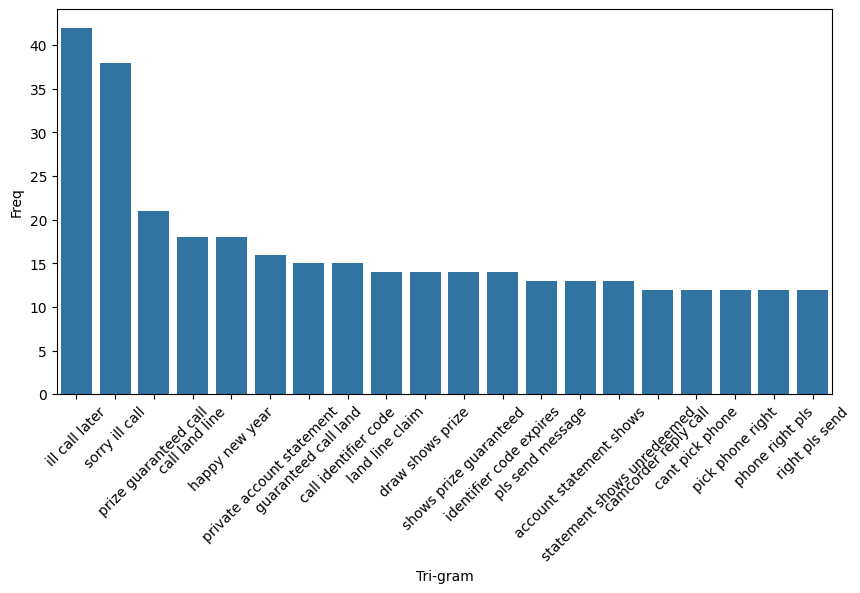

In [26]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# WordCloud

In [27]:
string_Total = " ".join(data["text"])  # single corpus

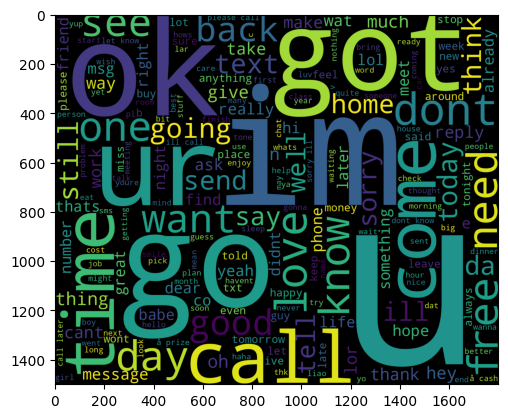

In [28]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

# Applying naive bayes for classification

spam or ham

In [29]:
data.head()

,type,text
0,ham,hope good week checking
1,ham,kgive back thanks
2,ham,also cbe pay
3,spam,complimentary star ibiza holiday å£ cash needs...
4,spam,okmail dear dave final notice collect tenerife...


In [30]:
def split_into_words(i):
    return (i.split(" "))
# split the data into single word

In [31]:
from sklearn.model_selection import train_test_split

email_train,email_test = train_test_split(data,test_size=0.3)

# Complte text data into 2 --> email_train,email_test

In [32]:
email_train

,type,text
3652,ham,haha yup hopefully lose kg mon hip hop go orch...
199,spam,well done costa del sol holiday å£ await colle...
4430,ham,im also came room
1949,ham,ya ok vikky vl c witin mins il reply u
759,ham,got new year cos yetunde said wanted surprise ...
...,...,...
4228,ham,jus finish lunch way home lor tot u dun wan st...
83,ham,nope since ayo travelled forgotten guy
3991,ham,supervisor find one lor thk students havent as...
2725,ham,pls accept one day begging change number


In [33]:
email_test

,type,text
1204,ham,ok lor buy wat
4164,ham,u made appointment
5310,ham,masters buy bb cos sale hows bf
4308,ham,good baby
4281,ham,kall bestcongrats
...,...,...
4940,ham,im snowboarding trip wondering planning get ev...
1905,ham,pls give prometazine syrup mins later feed
3253,spam,dont b floppy b snappy happy gay chat service ...
626,ham,hey dont forget mine possession property mmm c...


In [34]:
# Preparing email texts into word count matrix format

emails_bow = CountVectorizer(analyzer=split_into_words).fit(data.text)  # each word split-->data_text

# ["mailing","body","texting"]
# ["mailing","awesome","good"]

# ["mailing","body","texting","good","awesome"]



#        "mailing" "body" "texting" "good" "awesome"
#  0          1        1       1        0       0

#  1          1        0        0       1       1



In [35]:
# For all messages
all_emails_matrix = emails_bow.transform(data.text)
all_emails_matrix.shape

# Columns and rows

(5559, 8175)

In [37]:
# For training messages
# Bag of words
train_emails_matrix = emails_bow.transform(email_train.text)
train_emails_matrix.shape # (3891,8175)

# For testing messages
test_emails_matrix = emails_bow.transform(email_test.text)
test_emails_matrix.shape # (1668,8175)

(1668, 8175)

In [48]:
# Extra
test_emails_matrix.toarray()

# what is there in the matrix
# all data into a numerical

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### Multinomial Naive Bayes

In [38]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set
# it is text data we need not encoding

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
import numpy as np
classifier_mb = MB()   # call that (MB)method --> store it vari
classifier_mb.fit(train_emails_matrix,email_train.type)    # fit train , ham or spam
train_pred_m = classifier_mb.predict(train_emails_matrix)  # predit
accuracy_train_m = np.mean(train_pred_m==email_train.type) #
print(accuracy_train_m) # 98%

test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%
print(accuracy_test_m)

# train and test acu are same (There is no overfit and underfitting)
# all of accuracy compare (BOW)bag of words eith Multinomial naive base is best.
# This method is best

0.9899768696993061
0.9652278177458034


#### Gaussian Naive Bayes9-0

In [39]:
# Gaussian Naive Bayes9-0

classifier_gb = GB()
classifier_gb.fit(train_emails_matrix.toarray(),email_train.type.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_emails_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.type) # 95%
print(accuracy_train_g )

test_pred_g = classifier_gb.predict(test_emails_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.type) # 90%
print(accuracy_test_g)

0.9509123618607042
0.8848920863309353


# Using TFIDF

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(train_emails_matrix)

print(train_tfidf.shape) # (3891,8175) (stating 5559rows, 1col)

# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(test_emails_matrix)

print(test_tfidf.shape) #  (1668, 8175)



(3891, 8175)
(1668, 8175)


In [41]:
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.type)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==email_train.type) # 96%
print(accuracy_train_m)

test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%
print(accuracy_test_m)



0.9719866358262658
0.9592326139088729


In [42]:
accuracy_train_m

0.9719866358262658

In [43]:
# Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(train_tfidf.toarray(),email_train.type.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(train_tfidf.toarray())
accuracy_train_g = np.mean(train_pred_g==email_train.type) # 95%
test_pred_g = classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g = np.mean(test_pred_g==email_test.type) # 88%

# inplace of tfidf we can also use train_emails_matrix and test_emails_matrix instead of term inverse document frequency matrix

In [44]:
accuracy_test_g

0.8788968824940048

In [45]:
accuracy_train_g

0.9509123618607042